<a href="https://colab.research.google.com/github/abotiamnot/SteamUnwrapped/blob/main/SteamUnwrappedPublic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import requests
import calendar
from datetime import datetime

In [ ]:
# Key: CAC2BC83DC760796ED074B6E83D24560

# Domain Name: moosnhr00m

# Link - http://api.steampowered.com/<interface name>/<method name>/v<version>/?key=<api key>&format=<format>

user_id = 76561198082614415
api_key = 'YOUROWNAPIKEY'

In [ ]:
# GetUserStatsForGame
# get_user_stats = f'http://api.steampowered.com/ISteamUserStats/GetUserStatsForGame/v0002/?appid={game_id}&key={api_key}&steamid={user_id}'

# GetOwnedGames
get_owned_games = f'http://api.steampowered.com/IPlayerService/GetOwnedGames/v0001/?key={api_key}&steamid={user_id}&format=json'

# Get Achievements info by game
# get_game_ach = f' http://api.steampowered.com/ISteamUserStats/GetPlayerAchievements/v0001/?appid={game_id}&key={api_key}&steamid={user_id}'


In [ ]:
getOwnedGamesResponse = requests.get(get_owned_games)

In [ ]:
getOwnedGames = json.loads(getOwnedGamesResponse.text)['response']

In [ ]:
epoch_2022 = calendar.timegm(datetime(2022, 1, 1, 0, 0, 0).timetuple())

In [ ]:
getOwnedGames['games'][0]

{'appid': 10,
 'playtime_forever': 575,
 'playtime_windows_forever': 4,
 'playtime_mac_forever': 0,
 'playtime_linux_forever': 0,
 'rtime_last_played': 1659796825}

In [ ]:
playedGameIDs = []
for game in getOwnedGames['games']:
  temp_game_dict = {'ID': None,
                    'LASTPLAYED': None}
  if int(game['rtime_last_played']) > epoch_2022:
    temp_game_dict['ID'] = game['appid']
    temp_game_dict['LASTPLAYED'] = game['rtime_last_played']
    temp_game_dict['TIMEPLAYED'] = game['playtime_forever']
    playedGameIDs.append(temp_game_dict)

In [ ]:
def getMoreGameInfo(app_id):
  getMoreGameInfoEndPoint = f'https://steamspy.com/api.php?request=appdetails&appid={app_id}'
  getMoreGameInfoSource = requests.get(getMoreGameInfoEndPoint).json()
  tags = list(getMoreGameInfoSource['tags'].keys())
  genre = getMoreGameInfoSource['genre']
  game_dict = {}
  game_dict['TAGS'] = tags
  game_dict['GENRE'] = [i.strip() for i in genre.split(',')]
  game_dict['DEVELOPER'] = [i.strip() for i in getMoreGameInfoSource['developer'].split(', ')]
  return game_dict

In [ ]:
def getGameInfo(game_dict_orig, debug=False):
  game_id = game_dict_orig['ID']
  get_game_ach = f' http://api.steampowered.com/ISteamUserStats/GetPlayerAchievements/v0001/?appid={game_id}&key={api_key}&steamid={user_id}'
  game_dict = {'NAME': None,
               'FIRSTACHIEVEMENT': None,
               'ALLACH': None}
  if debug:
    print(requests.get(get_game_ach).text)
  getGameData = json.loads(requests.get(get_game_ach).text)['playerstats']
  game_dict['NAME'] = getGameData['gameName']
  ach_list = []
  total_ach = 0
  for ach in getGameData['achievements']:
    total_ach = total_ach + 1
    if ach['unlocktime'] != 0:
      ach_list.append(ach['unlocktime'])
  if len(ach_list) == 0:
    game_dict['FIRSTACHIEVEMENT'] = None
  else:
    game_dict['FIRSTACHIEVEMENT'] = min(ach_list)
  game_dict['ALLACH'] = ach_list
  game_dict.update(game_dict_orig)
  game_dict.update(getMoreGameInfo(game_id))
  return game_dict

In [ ]:
all_played_games_2022 = []
i = 0
for game in playedGameIDs:
  print("{}/{}".format(i, len(playedGameIDs)))
  i = i + 1 
  try:
    all_played_games_2022.append(getGameInfo(game))
  except Exception as e:
    if e == '''{"playerstats":{"error":"Requested app has no stats","success":false}}''':
      continue
    else:
      print(e)

0/95
'gameName'
1/95
'gameName'
2/95
'gameName'
3/95
4/95
'gameName'
5/95
'gameName'
6/95
7/95
8/95
9/95
10/95
'gameName'
11/95
12/95
13/95
14/95
15/95
'gameName'
16/95
17/95
18/95
19/95
20/95
21/95
'gameName'
22/95
23/95
24/95
25/95
26/95
27/95
28/95
29/95
30/95
31/95
32/95
33/95
34/95
35/95
'gameName'
36/95
37/95
38/95
39/95
40/95
'gameName'
41/95
42/95
43/95
44/95
45/95
46/95
47/95
48/95
'gameName'
49/95
50/95
51/95
'gameName'
52/95
53/95
54/95
55/95
56/95
'gameName'
57/95
58/95
59/95
60/95
61/95
62/95
63/95
64/95
65/95
66/95
67/95
68/95
69/95
70/95
71/95
72/95
73/95
74/95
'gameName'
75/95
76/95
77/95
78/95
79/95
'gameName'
80/95
81/95
82/95
83/95
84/95
85/95
86/95
87/95
88/95
89/95
90/95
91/95
'gameName'
92/95
93/95
94/95


In [ ]:
for i in all_played_games_2022:
  if 'Rising Stars Games' in i['DEVELOPER']:
    print(i)
    print('\n')

In [ ]:
from collections import Counter

def generateTagWeight(all_games):

  # TAG WEIGHT
  tag_weight = {}
  genre_weight = {}
  dev_weight = {}

  #TAG_PLAYED
  tag_played = {}
  genre_played = {}
  dev_played = {}

  #TAG ACHVIEMENT
  tag_ach = {}
  genre_ach = {}
  dev_ach = {}

  for game_dict in all_games:
    if game_dict['FIRSTACHIEVEMENT'] is not None:
      if int(game_dict['FIRSTACHIEVEMENT']) < epoch_2022:
        continue
    playedTime = game_dict['TIMEPLAYED']
    numberPlayed = 1
    achCompleted = len(game_dict['ALLACH'])

    tags = game_dict['TAGS']
    genres = game_dict['GENRE']
    devs = game_dict['DEVELOPER']

    #TAG WEIGHT

    tag_wt = dict.fromkeys(tags, playedTime)
    genre_wt = dict.fromkeys(genres, playedTime)
    dev_wt = dict.fromkeys(devs, playedTime)

    tag_weight = Counter(tag_weight) + Counter(tag_wt)
    genre_weight = Counter(genre_weight) + Counter(genre_wt)
    dev_weight = Counter(dev_weight) + Counter(dev_wt)

    #TAG PLAYED

    tag_play = dict.fromkeys(tags, 1)
    genre_play = dict.fromkeys(genres, 1)
    dev_play = dict.fromkeys(devs, 1)

    tag_played = Counter(tag_played) + Counter(tag_play)
    genre_played = Counter(genre_played) + Counter(genre_play)
    dev_played = Counter(dev_played) + Counter(dev_play)

    #TAG ACH

    tag_ac = dict.fromkeys(tags, achCompleted)
    genre_ac = dict.fromkeys(genres, achCompleted)
    dev_ac = dict.fromkeys(devs, achCompleted)

    tag_ach = Counter(tag_ach) + Counter(tag_ac)
    genre_ach = Counter(genre_ach) + Counter(genre_ac)
    dev_ach = Counter(dev_ach) + Counter(dev_ac)

  tags_dicts = [dict(tag_weight), dict(tag_played), dict(tag_ach)]
  genres_dicts = [dict(genre_weight), dict(genre_played), dict(genre_ach)]
  devs_dicts = [dict(dev_weight), dict(dev_played), dict(dev_ach)]

  allDicts = [tags_dicts, genres_dicts, devs_dicts]

  return allDicts

In [ ]:
allDicts = generateTagWeight(all_played_games_2022)

In [ ]:
import pandas as pd 

analysisCols = ['name', 'weight', 'number_of_games_played', 'number_of_achievements']
dfList = []
analysisList = []
for sublist in allDicts:
  analysisDataFrame = pd.DataFrame(columns = analysisCols)
  fullKeyList = []
  i = 0
  for subdict in sublist:
    i = i + 1
    if i == 1:
      fullKeyList = list(set(fullKeyList).union(set(list((subdict.keys())))))
      analysisDataFrame['name'] = fullKeyList
    analysisDataFrame[analysisCols[i]] = analysisDataFrame['name'].map(subdict)
  analysisList.append(analysisDataFrame)

In [ ]:
for i in range(0, len(analysisList)):
  analysisList[i] = analysisList[i].sort_values(by=['weight'], ascending=False)
  analysisList[i].fillna(0)

In [ ]:
analysisList[2]

,name,weight,number_of_games_played,number_of_achievements
51,FromSoftware Inc.,16191,1,42.0
47,Ryu Ga Gotoku Studio,8356,4,52.0
9,SEGA,6172,3,74.0
31,Ltd.,5412,3,38.0
32,CAPCOM Co.,5412,3,38.0
33,Hello Games,2797,1,16.0
30,id Software,2786,1,30.0
12,High Moon Studios,2008,1,NaN
13,Sledgehammer Games,2008,1,NaN
28,Activision Shanghai,2008,1,NaN


In [ ]:
analysisList[2] = analysisList[2].drop(31)

In [ ]:
analysisList[2]

,name,weight,number_of_games_played,number_of_achievements
51,FromSoftware Inc.,16191,1,42.0
47,Ryu Ga Gotoku Studio,8356,4,52.0
9,SEGA,6172,3,74.0
32,CAPCOM Co.,5412,3,38.0
33,Hello Games,2797,1,16.0
30,id Software,2786,1,30.0
12,High Moon Studios,2008,1,NaN
13,Sledgehammer Games,2008,1,NaN
28,Activision Shanghai,2008,1,NaN
18,Toys for Bob,2008,1,NaN


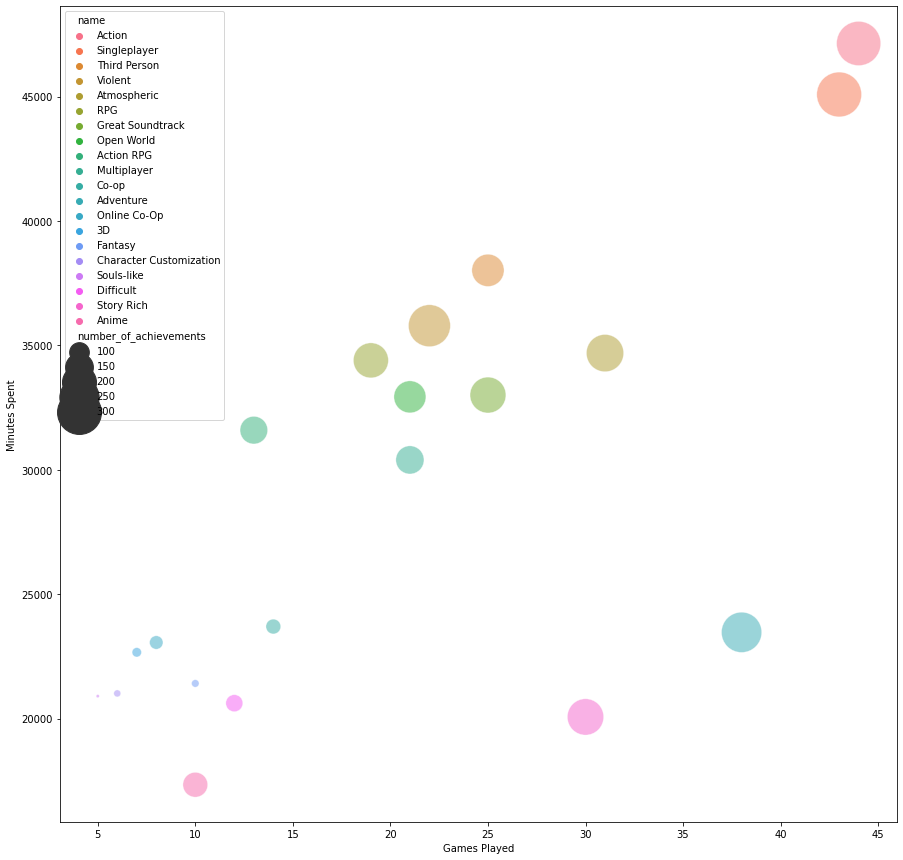

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [15, 15]

# data 
data = analysisList[0].head(20)
 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="number_of_games_played", y="weight", size="number_of_achievements", hue="name", alpha=0.5, legend='auto', sizes=(10, 2000))

# Set x-axis label
plt.xlabel('Games Played')
# Set y-axis label
plt.ylabel('Minutes Spent')

# show the graph
plt.show()

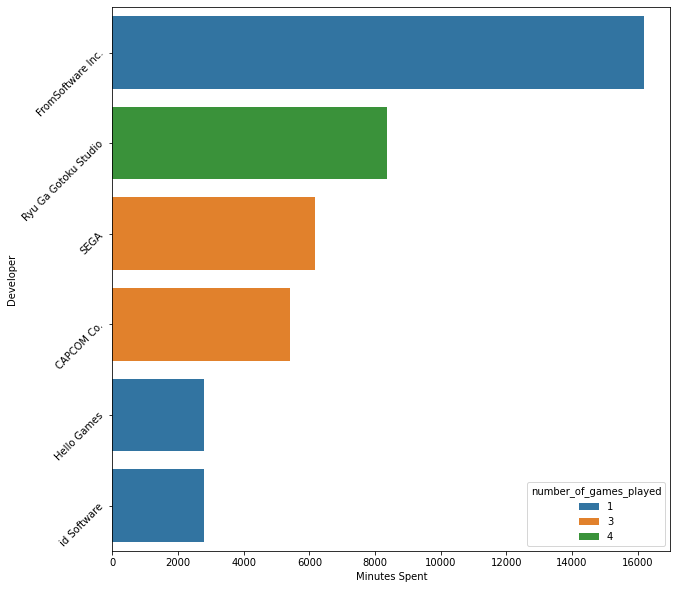

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

sns.barplot(data=analysisList[2].head(6), y=analysisList[2].head(6)["name"], x=analysisList[2].head(6)["weight"], hue="number_of_games_played", orient="h", dodge=False)

plt.yticks(rotation=45)
# Set x-axis label
plt.xlabel('Minutes Spent')
# Set y-axis label
plt.ylabel('Developer')
plt.show()